<a href="https://colab.research.google.com/github/ClaudeCoulombe/VIARENA/blob/master/Labos/Petites_experiences_avec_la_convolution.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Rappel - Fonctionnement d'un carnet web iPython

* Pour exécuter le code contenu dans une cellule d'un carnet iPython, cliquez dans la cellule et faites (⇧↵, shift-enter) 
* Le code d'un carnet iPython s'exécute séquentiellement de haut en bas de la page. Souvent, l'importation d'une bibliothèque Python ou l'initialisation d'une variable est préalable à l'exécution d'une cellule située plus bas. Il est donc recommandé d'exécuter les cellules en séquence. Enfin, méfiez-vous des retours en arrière qui peuvent réinitialiser certaines variables.

# Petites expériences avec la convolution

Vous allez expérimenter l'application de filtres de convolution simples pour identifier des lignes horizontales et verticales. Dans un premier temps sur des images synthétiques puis sur une image de chevreuil faisant partie du jeu de données CIFAR-10. 

Concrètement, nous allons expérimenter avec une convolution capable de détecter (ou filtrer) des lignes verticales. Le filtre utilisé est un tableau 3 x 3 ayant une colonne de 1, suivie d’une colonne de 0 et d’une colonne de -1. De son côté, un filtre capable de détecter des lignes horizontales est simplement une transposition du filtte précédent. C'est-à-dire un tableau 3 x 3 ayant une ligne de 1, suivie d’une ligne de 0 et d’une ligne de -1.

In [157]:
import numpy as np
import matplotlib.pyplot as plt

def convolution(image, filtre):
    # normalisation du filtre
    filtre_normal = filtre - filtre.mean()
    dim_filtre = filtre.shape[0]  
    representation = np.zeros([image.shape[0]-dim_filtre+1,
                               image.shape[1]-dim_filtre+1])
    # Balayage de l'image
    for ligne in range(image.shape[0]-2):
        for col in range(image.shape[1]-dim_filtre+1):
            # Calcul de la convolution
            representation[ligne, col] = np.sum(image[ligne:ligne+dim_filtre,
                                                col:col+dim_filtre]*filtre_normal)
    return representation

Voici un filtre pour détecter des lignes verticales:

    [[ 1,  0, -1],
     [ 1,  0, -1],
     [ 1,  0, -1]]
                   
En appliquant ce filtre à une image de damier, on ne trouvera pas de ligne comme révélé par notre petite expérience. Par contre, si nous appliquons ce filtre à une image comportant une ligne verticale cela donne le résultat attendu.

#### Détection de lignes verticales dans un damier

image:
 [[1 0 1 0 1 0]
 [0 1 0 1 0 1]
 [1 0 1 0 1 0]
 [0 1 0 1 0 1]
 [1 0 1 0 1 0]
 [0 1 0 1 0 1]]


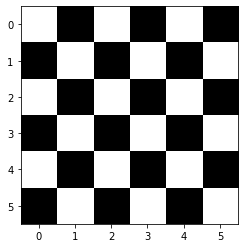

Filtre vertical:
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

Résultat convolution:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


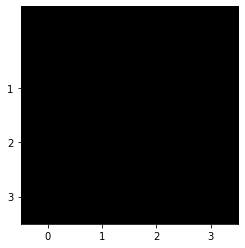

In [158]:
# image synthétique d'un damier
image = np.array([[1,0,1,0,1,0],
                  [0,1,0,1,0,1],
                  [1,0,1,0,1,0],
                  [0,1,0,1,0,1],
                  [1,0,1,0,1,0],
                  [0,1,0,1,0,1]
                 ])

print("image:\n",image)

plt.imshow(image,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

# Filtre pour reconnaître des lignes verticales dans une image
filtre = np.array([[ 1,  0, -1],
                   [ 1,  0, -1],
                   [ 1,  0, -1]])
print("Filtre vertical:\n",filtre)

resultat_convolution = convolution(image,filtre)
print("\nRésultat convolution:\n",resultat_convolution)

yint = range(1, 5)
plt.yticks(yint)
plt.imshow(resultat_convolution,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

**Note:** Notre damier régulier ne comporte pas de lignes verticales. Le résultat est donc une tableau vide.

#### Détection de lignes verticales dans une image synthétique comportant une ligne verticale

image:
 [[0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]]


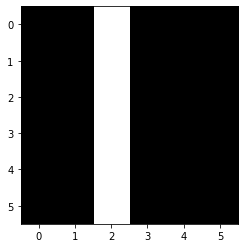

Filtre vertical:
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

Résultat convolution:
 [[-3.  0.  3.  0.]
 [-3.  0.  3.  0.]
 [-3.  0.  3.  0.]
 [-3.  0.  3.  0.]]


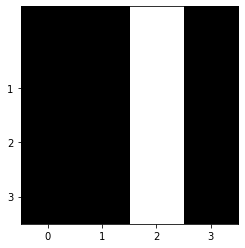

In [159]:
# image synthétique comportant une ligne verticale
image = np.array([[0,0,1,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,1,0,0,0]
                 ])

print("image:\n",image)

plt.imshow(image,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

# Filtre pour reconnaître des lignes verticales dans une image
filtre = np.array([[ 1,  0, -1],
                   [ 1,  0, -1],
                   [ 1,  0, -1]])
print("Filtre vertical:\n",filtre)

resultat_convolution = convolution(image,filtre)
print("\nRésultat convolution:\n",resultat_convolution)

yint = range(1, 5)
plt.yticks(yint)
plt.imshow(resultat_convolution,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

**Note:** Ici, la ligne verticale a été détectée par le filtre.

image:
 [[0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0]]


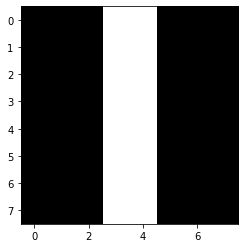

Filtre vertical:
 [[0 1 0]
 [0 1 0]
 [0 1 0]]

Résultat convolution:
 [[ 0. -1.  1.  1. -1.  0.]
 [ 0. -1.  1.  1. -1.  0.]
 [ 0. -1.  1.  1. -1.  0.]
 [ 0. -1.  1.  1. -1.  0.]
 [ 0. -1.  1.  1. -1.  0.]
 [ 0. -1.  1.  1. -1.  0.]]


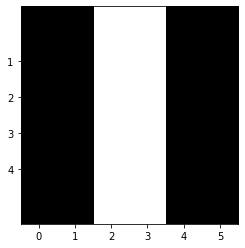

In [160]:
# image synthétique comportant une ligne verticale
image = np.array([[0, 0, 0, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 1, 0, 0, 0]])

print("image:\n",image)

plt.imshow(image,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

# Filtre pour reconnaître des lignes verticales dans une image
filtre = np.array([[ 1,  0, -1],
                   [ 1,  0, -1],
                   [ 1,  0, -1]])
filtre = np.array([[ 0,  1, 0],
                   [ 0,  1, 0],
                   [ 0,  1, 0]])
print("Filtre vertical:\n",filtre)

resultat_convolution = convolution(image,filtre)
print("\nRésultat convolution:\n",resultat_convolution)

yint = range(1, 5)
plt.yticks(yint)
plt.imshow(resultat_convolution,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

## Expérience avec une photo de chevreuil en tons de gris


 ******************************************************************************** 

image.shape: (32, 32)


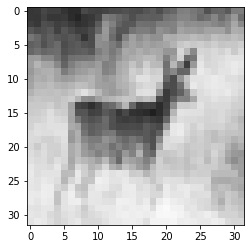


 ******************************************************************************** 


Filtre ligne horizontale:
 [[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]]


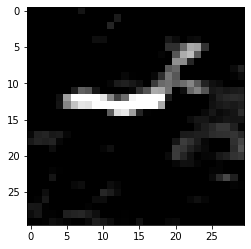


 ******************************************************************************** 


Filtre ligne verticale:
 [[ 1.  0. -1.]
 [ 1.  0. -1.]
 [ 1.  0. -1.]]


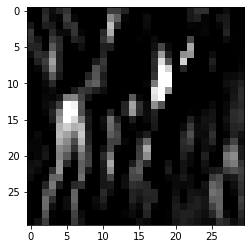


 ******************************************************************************** 


Filtre : zone claire entourée de pixels plus foncés
 [[-1. -1. -1.]
 [-1.  1. -1.]
 [-1. -1. -1.]]


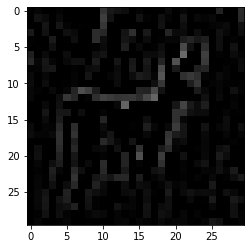


 ******************************************************************************** 



In [188]:
chemin_data = "https://cours.edulib.org/asset-v1:Cegep-Matane+VAERN.1FR+P2021+type@asset+block@"

print("\n","*"*80,"\n")

# Image source
image = plt.imread(chemin_data+"Chevreuil-0621_rouge-blanc_noir.png")
print("image.shape:",image.shape)

plt.imshow(image,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

print("\n","*"*80,"\n")
# Filtre ligne horizontale
filtre = np.array([[ +1.0, +1.0, +1.0],
                   [ +0.0, +0.0, +0.0],
                   [ -1.0, -1.0, -1.0]])
print("\nFiltre ligne horizontale:\n",filtre)

resultat_convolution = convolution(image,filtre)

plt.imshow(resultat_convolution,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

print("\n","*"*80,"\n")
# Filtre ligne verticale
filtre = np.array([[ +1.0, +0.0, -1.0],
                   [ +1.0, +0.0, -1.0],
                   [ +1.0, +0.0, -1.0]])
print("\nFiltre ligne verticale:\n",filtre)

resultat_convolution = convolution(image,filtre)

plt.imshow(resultat_convolution,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

print("\n","*"*80,"\n")
# Filtre : zone claire entourée de pixels plus foncés
filtre = np.array([[-1.0, -1.0, -1.0], 
                   [-1.0, +1.0, -1.0],
                   [-1.0, -1.0, -1.0]])
print("\nFiltre : zone claire entourée de pixels plus foncés\n",filtre)

resultat_convolution = convolution(image,filtre)

plt.imshow(resultat_convolution,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

print("\n","*"*80,"\n")


**Note:** Le filtre de lignes horizontales fait ressortir le dos du chevreuil alors que le filtre de lignes verticales fait ressortir ses pattes et ses oreilles et le filtre pixel clair entouré de pixels foncés révèle le contour du chevreuil.

## Complément utile
Ci-dessous, une manipulation simple de l'image en y ajoutant un carré noir.

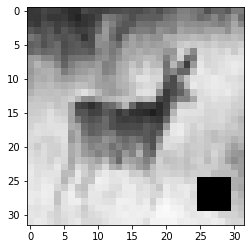

In [185]:
image[25:30,25:30]=0
plt.imshow(image,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()
